#### Importación de librerias

In [2]:
import biosignalsnotebooks as bsnb
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pywt

from numpy import array, mean, average, std, sum, sqrt, where, argmax
from numpy.random import normal
from scipy.signal import iirnotch, lfilter


#### Importación de las señales

In [3]:
Tibial_Inicial = np.genfromtxt("../sEMG_Signals/TibialAnterior_FaseInicial.txt",  delimiter="\t",skip_header = 3)
Tibial_Final = np.genfromtxt("../sEMG_Signals/TibialAnterior_FaseFinal.txt",  delimiter="\t",skip_header = 3)
Fs = 1000
Ts = 1/Fs
Tibial_Inicial = Tibial_Inicial[:,5]
Tibial_Final = Tibial_Final[:,5]
Time1 = bsnb.generate_time(Tibial_Inicial, Fs)
Time2 = bsnb.generate_time(Tibial_Final, Fs)

In [4]:
# Funcion de transferencia
Gemg = 1009
Vcc = 3.3
n = 10

Tibial_Inicial = (((Tibial_Inicial/2**n)-(1/2))*Vcc)/Gemg
Tibial_Inicial = Tibial_Inicial * 1000

Tibial_Final = (((Tibial_Final/2**n)-(1/2))*Vcc)/Gemg
Tibial_Final = Tibial_Final * 1000

#### Señal incial

##### Visualización

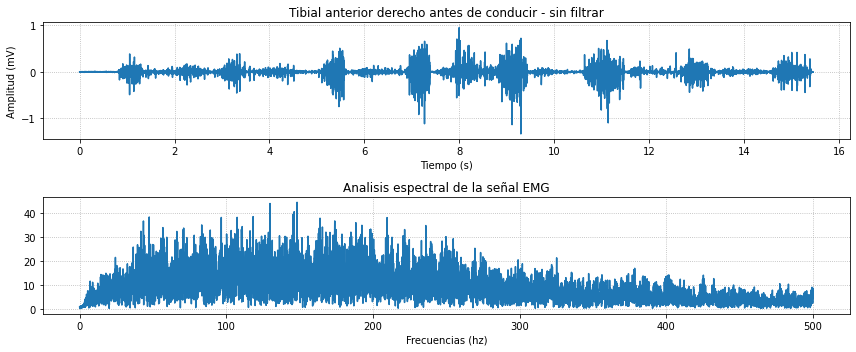

In [5]:
#Transformada de Fourier
freq_axis_1, power_spect_1 = bsnb.plotfft(Tibial_Inicial, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time1,Tibial_Inicial)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Tibial anterior derecho antes de conducir - sin filtrar")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_1, power_spect_1)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Filtrado

In [6]:
Tibial_InicialFilter = bsnb.bandpass(Tibial_Inicial, f1=30,f2=350, order=8, fs=Fs)

# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
Tibial_InicialFilter = lfilter(b, a, Tibial_InicialFilter)
Tibial_InicialFilter = lfilter(b, a, Tibial_InicialFilter)

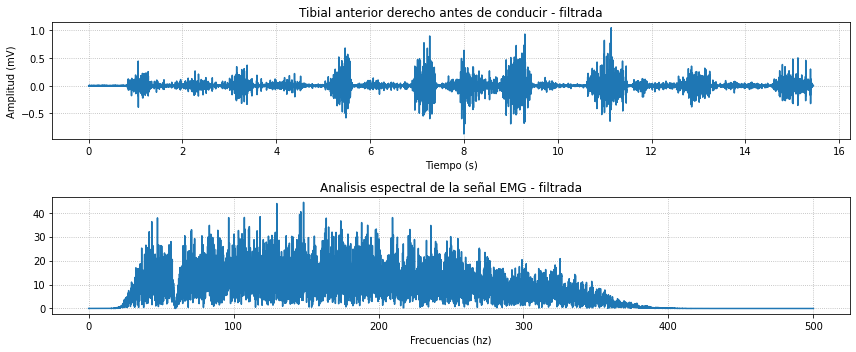

In [7]:
#Transformada de Fourier
freq_axis_2, power_spect_2 = bsnb.plotfft(Tibial_InicialFilter, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time1,Tibial_InicialFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Tibial anterior derecho antes de conducir - filtrada")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG - filtrada")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_2, power_spect_2)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Características

In [8]:
Caracteristicas_Inicial = {}
Caracteristicas_Inicial = bsnb.emg_parameters(Tibial_InicialFilter, Fs, raw_to_mv=False)


##### Señal después de conducir

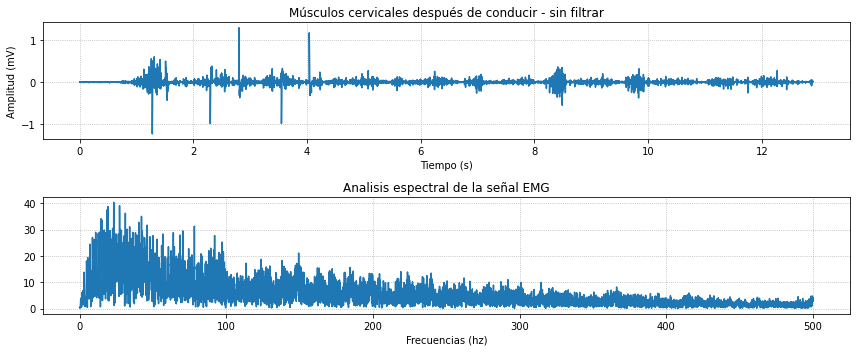

In [9]:
#Transformada de Fourier
freq_axis_3, power_spect_3 = bsnb.plotfft(Tibial_Final, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,Tibial_Final)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Músculos cervicales después de conducir - sin filtrar")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_3, power_spect_3)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Filtrado

In [10]:
Tibial_FinalFilter = bsnb.bandpass(Tibial_Final, f1=30,f2=350, order=8, fs=Fs)

# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
Tibial_FinalFilter = lfilter(b, a, Tibial_FinalFilter)
Tibial_FinalFilter = lfilter(b, a, Tibial_FinalFilter)

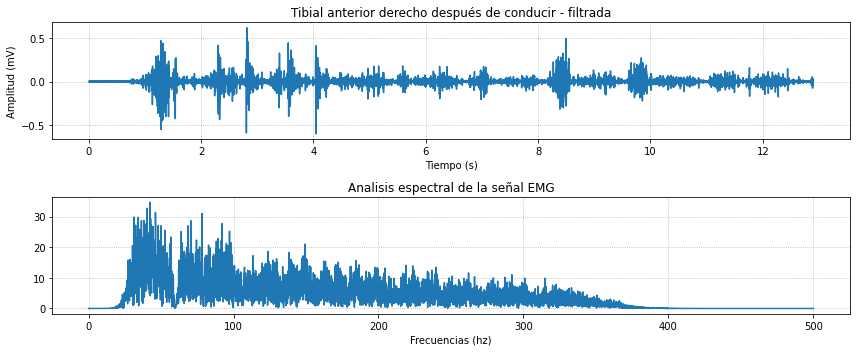

In [11]:
#Transformada de Fourier
freq_axis_4, power_spect_4 = bsnb.plotfft(Tibial_FinalFilter, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,Tibial_FinalFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Tibial anterior derecho después de conducir - filtrada")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_4, power_spect_4)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

In [17]:
import csv
import pandas as pd

def agregar_filas_con_nombres(nombre_archivo, nuevas_filas, nombres_filas):
    try:
        # Intenta cargar el archivo CSV existente como DataFrame
        df = pd.read_csv(nombre_archivo, index_col='Nombres')
    except FileNotFoundError:
        # Si el archivo no existe, crea un DataFrame vacío
        df = pd.DataFrame()

    # Crea un DataFrame con las nuevas filas y nombres de filas
    df = pd.DataFrame(nuevas_filas, index=nombres_filas)

    return df

nombre_del_archivo = 'Gestos1.csv'

# Nuevas filas que quieres agregar (una lista de listas)
nuevas_filas = [Tibial_FinalFilter, Tibial_InicialFilter]

#Nombres columnas
nombres_nuevas_filas =  ['Tibial_FinalFilter', 'Tibial_InicialFilter']

df_ultimate= agregar_filas_con_nombres(nombre_del_archivo, nuevas_filas, nombres_nuevas_filas)

df_ultimate.to_csv(nombre_del_archivo, index_label='Nombres')

##### Características

Text(0.5, 1.0, 'Tibial anterior derecho después de conducir - filtrada')

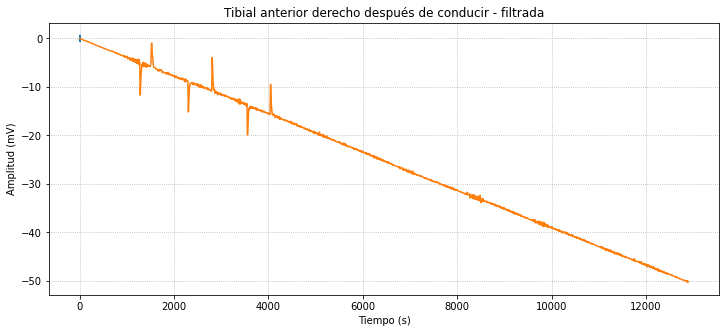

In [ ]:
import json
from scipy.integrate import cumtrapz


Caracteristicas_Final = {}
Caracteristicas_Final = bsnb.emg_parameters(Tibial_FinalFilter, Fs, raw_to_mv=False)
rms = sqrt(sum(Tibial_Final * Tibial_Final) / len(Tibial_Final))
area = cumtrapz(Tibial_Final)



#Ploteo de características
plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,Tibial_FinalFilter)
plt.grid(linestyle=":")
plt.plot(area)
plt.plot(rms,'b')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Tibial anterior derecho después de conducir - filtrada")    # graficamos la señal


In [ ]:

comparison_car = {}
comparison_car["Caracteristicas iniciales"] = Caracteristicas_Inicial 
comparison_car["Caracteristicas finales"] = Caracteristicas_Final
print(json.dumps(comparison_car, indent=4))